# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [49]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [15]:
#There are 9 reps in the North Branch

#Code Used:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [3]:
north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [16]:
#There are  reps in the South Branch

#Code Used:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [4]:
south_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
north_df = pd.read_csv('NorthCallCenter.csv')
north_df.mean(axis=0, numeric_only=True)

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:
south_df = pd.read_csv('SouthCallCenter.csv')
south_df.mean(axis=0, numeric_only=True)

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [13]:
# Code Used:
north_df = north_df.rename(columns={"Time Block": "TimeBlock"})
south_df = south_df.rename(columns={"Time Block": "TimeBlock"})

In [15]:
north_df.groupby('TimeBlock')["Calls"].value_counts().unstack()

Calls,1
TimeBlock,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [16]:
south_df.groupby('TimeBlock')["Calls"].value_counts().unstack()

Calls,1
TimeBlock,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Both the North and South branches have missing data in the "Incoming Wait Time" column. We could drop the missing data, however it can also be useful because it tells us that this is maybe how many calls were dropped/lost due to technical issues which can help solve another issue. 

In [7]:
# Code Used
# Add Additional Cells as needed.
north_missing_data_percents = north_df.isna().mean() * 100
north_missing_data_percents

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [8]:
south_missing_data_percents = south_df.isna().mean() * 100
south_missing_data_percents

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       59.872611
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: If it is duplicated, it becames unnecessary data so the data analyst would drop the duplicate.

In [12]:
north_df.head(50)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [ ]:
#Code Used
# Add Additional Cells as needed.


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Dropped duplicates, but there weren't any.

In [13]:
print(north_df.shape)

(245, 15)


In [14]:
print(south_df.shape)

(314, 15)


In [19]:
#Code Used
north_df.drop_duplicates()
south_df.drop_duplicates()
# Add Additional Cells as needed.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [20]:
north_df.drop_duplicates()
print(north_df.shape)

(245, 15)


In [21]:
south_df.drop_duplicates()
print(south_df.shape)

(314, 15)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The recorded data is all necessary in order to read into the efficiency of the current call reps.

In [ ]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [22]:
# Create dataframe for the entire company named df

df = pd.merge(south_df, north_df, how='outer', indicator=True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,_merge
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,left_only
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,left_only
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,left_only
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,left_only
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1,right_only
555,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1,right_only
556,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1,right_only
557,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1,right_only


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls


In [42]:
# Code Used
rep_ID = df.groupby('Rep ID')["Calls"].value_counts().unstack()
# Add Additional Cells as needed.
rep_ID

Calls,1
Rep ID,
Alice,20
Amanda,23
Andy,23
Brent,37
Cam,24
Duke,29
Eric,35
George,29
Helga,31


In [38]:
north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [39]:
south_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
The South Branch has fewer than 2% call abandonment rates which brings the whole company's rate to under 2% as well.

In [135]:
# Code Used
agg_mean = ['mean']

north_df.agg(agg_mean)

# Add Additional Cells as needed.

/var/folders/w5/r3xzcbyd7dnct76wm_1_mp9m0000gn/T/ipykernel_969/1358913718.py:4: FutureWarning: ['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  north_df.agg(agg_mean)


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
mean,122.0,0.020408,0.028571,9.987755,1.914286,3.04878,2.967347,1.0


In [133]:
south_df.agg(agg_mean)

/var/folders/w5/r3xzcbyd7dnct76wm_1_mp9m0000gn/T/ipykernel_969/4189840324.py:1: FutureWarning: ['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  south_df.agg(agg_mean)


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
mean,156.5,0.035032,0.012739,10.05414,1.910828,3.0,3.076433,1.0


In [45]:
df.agg(agg_mean)

/var/folders/w5/r3xzcbyd7dnct76wm_1_mp9m0000gn/T/ipykernel_8461/364217416.py:1: FutureWarning: ['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', '_merge'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(agg_mean)


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.5%, 33 calls <= 2 seconds, 245 total calls
- South Branch = 15.3%, 48 calls <= 2 seconds, 314 total calls
- Company Wide = 14.5%, 81 calls <= 2 seconds, 559 total calls

In [61]:
# Code Used

# Add Additional Cells as needed.

sort_data = north_df.sort_values(by=['Incoming Wait Time'], ascending=True)
sort_data.head(35)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
16,16,North,Complaint,3:00 PM,Incoming,B,Brent,NO,0,0,9,3,1.0,3,1
15,15,North,Complaint,1:00 PM,Incoming,B,Duke,NO,0,0,12,1,1.0,3,1
14,14,North,Complaint,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
13,13,North,Complaint,9:00 AM,Incoming,B,Duke,NO,0,0,9,2,1.0,4,1
11,11,North,Product Support,4:00 PM,Incoming,A,Amanda,NO,0,0,10,3,1.0,2,1
10,10,North,Product Support,4:00 PM,Incoming,A,Joe,NO,0,0,11,3,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1
12,12,North,Product Support,4:00 PM,Incoming,B,Todd,NO,0,0,12,2,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1


In [65]:
sort_data_south = south_df.sort_values(by=['Incoming Wait Time'], ascending=True)
sort_data_south.head(50)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
19,19,South,Complaint,5:00 PM,Incoming,D,Karl,NO,0,0,12,3,1.0,4,1
18,18,South,Complaint,1:00 PM,Incoming,C,Sandy,NO,0,0,10,3,1.0,3,1
17,17,South,Complaint,1:00 PM,Incoming,C,Eric,NO,0,0,12,3,1.0,3,1
15,15,South,Complaint,11:00 AM,Incoming,D,Randy,NO,0,0,12,3,1.0,4,1
14,14,South,Product Support,5:00 PM,Incoming,D,Randy,NO,0,0,10,3,1.0,2,1
13,13,South,Product Support,5:00 PM,Incoming,C,Alice,NO,0,0,11,3,1.0,3,1
12,12,South,Product Support,4:00 PM,Incoming,D,George,NO,0,0,10,1,1.0,4,1
11,11,South,Product Support,4:00 PM,Incoming,D,Josh,NO,0,0,11,3,1.0,3,1
10,10,South,Product Support,3:00 PM,Incoming,D,Helga,NO,0,0,9,1,1.0,3,1


In [68]:
total_sort = df.sort_values(by=['Incoming Wait Time'], ascending=True)
total_sort.head(85)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,_merge
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,left_only
330,16,North,Complaint,3:00 PM,Incoming,B,Brent,NO,0,0,9,3,1.0,3,1,right_only
314,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,right_only
315,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,right_only
316,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,35,South,Product Support,5:00 PM,Incoming,C,Alice,NO,0,0,10,3,2.0,4,1,left_only
356,42,North,Product Support,4:00 PM,Incoming,B,Duke,NO,0,0,10,1,3.0,3,1,right_only
355,41,North,Product Support,3:00 PM,Incoming,B,Lilly,NO,0,0,10,2,3.0,4,1,right_only
354,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1,right_only


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds


In [102]:
# Code Used 
north_df.mean(numeric_only=True)

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [103]:
south_df.mean(numeric_only=True)

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [104]:
df.mean(numeric_only=True)

Unnamed: 0               141.379249
Lost Call                  0.028623
Abandoned                  0.019678
Busy Minutes              10.025045
Not Ready Minutes          1.912343
Incoming Wait Time         3.019231
During Call Wait Time      3.028623
Calls                      1.000000
dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

A: 4.17%
B: 2.01%
C: 0.72%
D: 1.70%

> Chart style you chose and why: Since we are working with "Queue" and "Abandonment Rate," I chose a bar chart since we are comparing two or more values in the same category, which is "Calls."

In [126]:
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.merge(south_df, north_df, how='outer', indicator=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             559 non-null    int64   
 1   Branch                 559 non-null    object  
 2   Call Purpose           559 non-null    object  
 3   Time Block             559 non-null    object  
 4   Incoming or Outgoing   559 non-null    object  
 5   Queue                  559 non-null    object  
 6   Rep ID                 559 non-null    object  
 7   Sale                   559 non-null    object  
 8   Lost Call              559 non-null    int64   
 9   Abandoned              559 non-null    int64   
 10  Busy Minutes           559 non-null    int64   
 11  Not Ready Minutes      559 non-null    int64   
 12  Incoming Wait Time     208 non-null    float64 
 13  During Call Wait Time  559 non-null    int64   
 14  Calls                  559 non-null    int

In [88]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

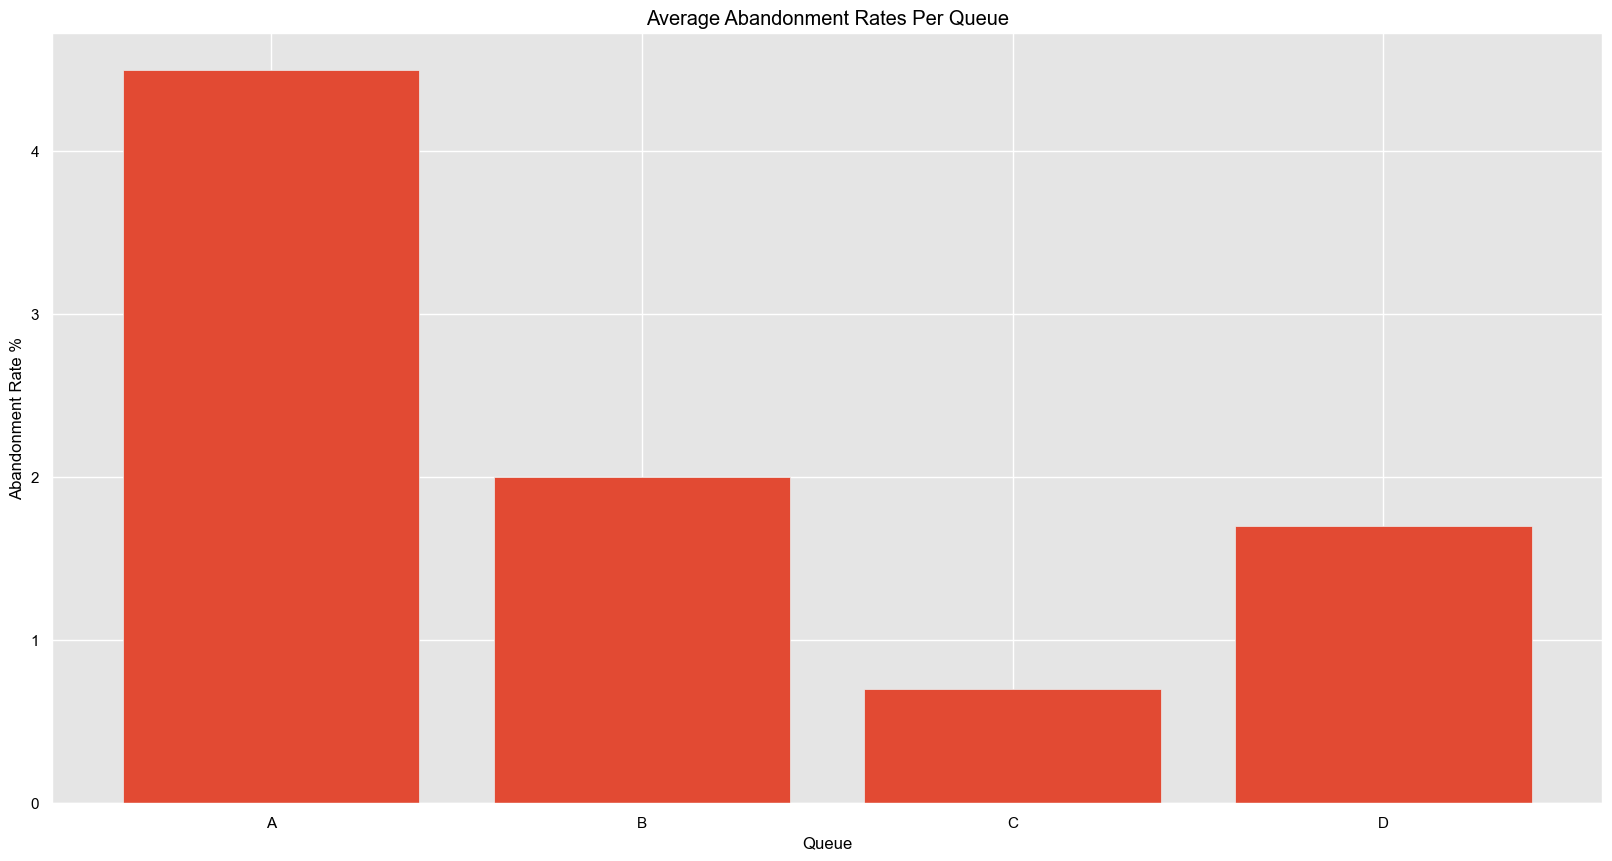

In [109]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from matplotlib import style

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')
df = pd.merge(south_df, north_df, how='outer', indicator=True)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

    
#Your Code Here:
ar = {'A': 4.5,
      'B': 2.0,
      'C': 0.7,
      'D': 1.7}
names = list(ar.keys())
values = list(ar.values())
    
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)    
plt.bar(range(len(ar)), values, tick_label=names)
plt.title("Average Abandonment Rates Per Queue",color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Abandonment Rate %',color = 'black')
plt.savefig('bar_vertical.png')

plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: Subplot in order to see each Rep ID's "Service Level %", as well as their "Incoming Wait Time Average."

Service Level %:
Amanda: 60%
Andy: 30%
Brent: 75%
Cam: 45.45%
Duke: 42.86%
Joe: 20%
Lilly: 33.33%
Todd: 33.33%
Xander: 33.33%

Average Speed of Answer:
Amanda: 
Andy:
Brent:
Cam:
Duke:
Joe:
Lilly:
Todd:
Xander:


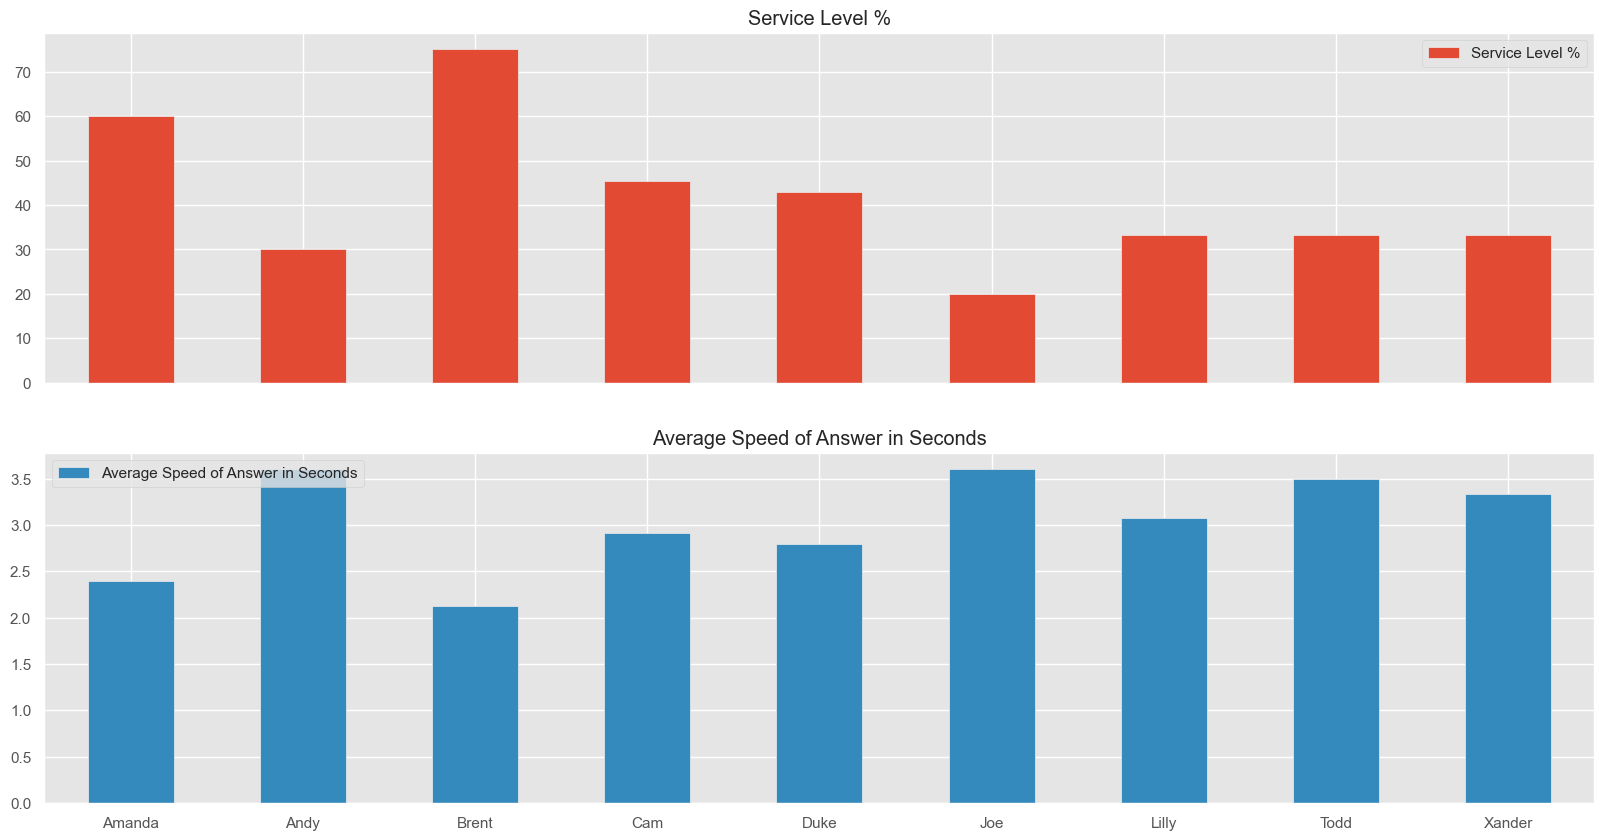

In [129]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service = [60, 30, 75, 45.45, 42.86, 20, 33.33, 33.33, 33.33]
speed = [2.4, 3.6, 2.13, 2.91, 2.79, 3.6, 3.08, 3.5, 3.33]
index = ['Amanda', 'Andy', 'Brent', 'Cam', 'Duke', 'Joe', 'Lilly', 'Todd', 'Xander']
northdf = pd.DataFrame({'Service Level %': service,
                       'Average Speed of Answer in Seconds': speed}, index=index)
ax = northdf.plot.bar(rot=0, subplots=True)
ax[1].legend(loc=2)

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
Complaint Outgoing: 0
Complaint Incoming: 51

Product Support Outgoing: 228
Product Support Incoming: 82

Sales Support Outgoing: 123
Sales Support Incoming: 75

> Chart style you chose and why: Grouped bar chart. There are three call purpose types and I plan to have one line for "Outgoing" and one for "Incoming" for each call purpose. Group bar charts allow for comparison of sub-groups. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


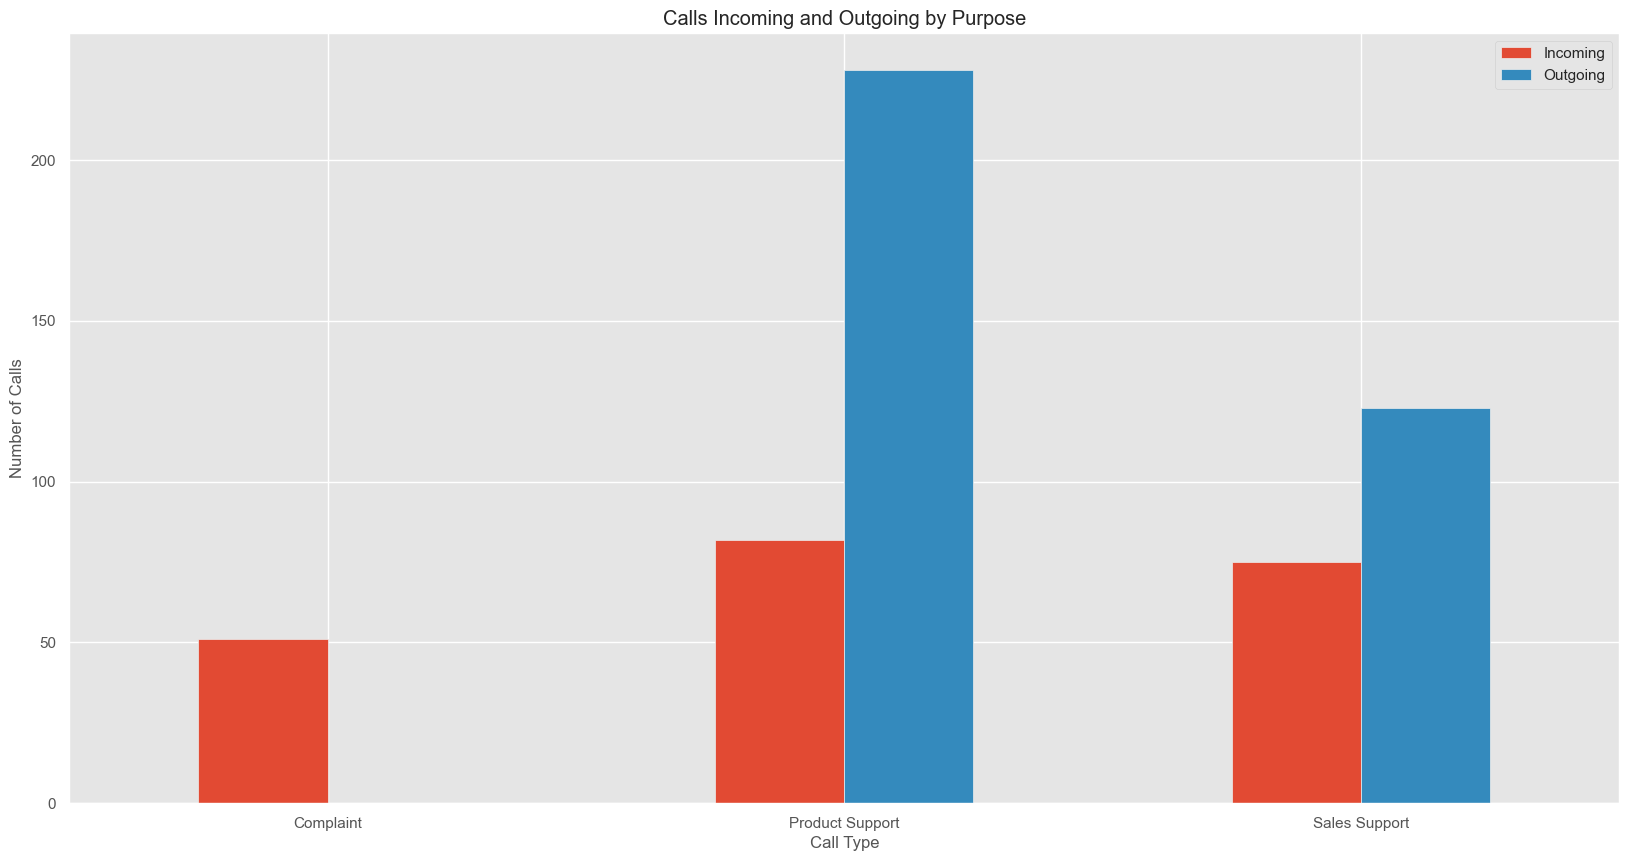

In [127]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
incoming = [51, 82, 75]
outgoing = [0, 228, 123]
index = ['Complaint', 'Product Support', 'Sales Support']
df = pd.DataFrame({'Incoming': incoming,
                       'Outgoing': outgoing}, index=index)
ax = df.plot.bar(rot=0)
# plt.title('Call Purposes Incoming and Outgoing')
# plt.xlabel('Call Type')
# plt.ylabel('Number of Calls')
# ax[1].legend(loc=2)

ax.set_title('Calls Incoming and Outgoing by Purpose')
ax.legend()
ax.set_xlabel('Call Type')
ax.set_ylabel('Number of Calls')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Overall, it appears that the North Branch is working more efficiently. There are two more reps in the South Branch than there are in the North Branch and the "Not Ready Minutes" are about the same, the "During Call Wait Times" were lower for the North Branch, and the highest amount of calls taken by a sales Rep was from the North Branch. Of course, the North Branch is not more efficient in every aspect. For example, the North Branch is responsible for Queue A and Queue B and those two Queues are responsible for the higher average abandonment rates. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
The South Branch could benefit from extra help. There are two more reps in the South Branch than there are in the North Branch and the "Not Ready Minutes" are about the same, the "During Call Wait Times" were lower for the North Branch, and the highest amount of calls taken by a sales Rep was from the North Branch. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
Another piece of valuable information could be customer ratings on the call on a scale from 1-5, 5 being the most satisfied in order to see if the person on the other end of the phone was efficiently getting the help they need.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["TimeBlock", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: